In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay

In [66]:
from sklearn.datasets import load_diabetes

In [4]:
ins_df = pd.read_csv('insurance.csv')
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
ins_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
ins_df_onehot = pd.get_dummies(ins_df, columns=['sex', 'smoker', 'region']).drop('charges', axis=1)
ins_df_target = ins_df['charges']
ins_df_onehot

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(ins_df_onehot.values, ins_df_target.values, random_state=0)

In [17]:
pipe = make_pipeline(MinMaxScaler(), LinearRegression()).fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7958786376014413

In [19]:
y_pred = pipe.predict(X_test)

In [20]:
pd.DataFrame(zip(y_test, y_pred), columns=['actual', 'predict'])

,actual,predict
0,9724.53000,11121.101409
1,8547.69130,9369.083452
2,45702.02235,38349.258807
3,12950.07120,16331.935006
4,9644.25250,7041.227706
...,...,...
330,13224.05705,15034.106647
331,4433.91590,7121.723799
332,9377.90470,10602.930893
333,3597.59600,7050.864796


In [23]:
pipe.named_steps['linearregression'].coef_

array([ 1.15069979e+04,  1.23886402e+04,  2.21106880e+03, -6.63153624e+00,
        6.63153624e+00, -1.18283103e+04,  1.18283103e+04,  5.35344576e+02,
        3.42211643e+02, -5.44457080e+02, -3.33099139e+02])

In [30]:
pipe2 = make_pipeline(MinMaxScaler(), Lasso(alpha=0.1)).fit(X_train, y_train)
pipe2.score(X_test, y_test)

0.7958757989117826

In [43]:
pipe2 = make_pipeline(MinMaxScaler(), SGDRegressor()).fit(X_train, y_train)
pipe2.score(X_train, y_train), pipe2.score(X_test, y_test)

(0.7330725912668523, 0.7944397776470538)

In [44]:
pipe2.named_steps['sgdregressor'].n_iter_

77

In [46]:
cer_df = pd.read_csv('cereal.csv')
cer_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [47]:
cer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [48]:
cer_df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [54]:
cer_df2 = (cer_df
.drop(['name', 'mfr', 'type', 'rating'], axis=1)
)
cer_df2

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


In [51]:
cer_df2.nunique()

calories    11
protein      5
fat          5
sodium      27
fiber       12
carbo       21
sugars      16
potass      36
vitamins     3
shelf        3
weight       7
cups        12
dtype: int64

<AxesSubplot:xlabel='sugars', ylabel='rating'>

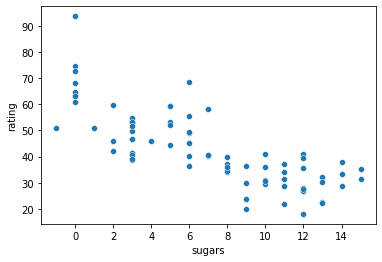

In [52]:
sns.scatterplot(data=cer_df, x='sugars', y='rating')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(cer_df2.values, cer_df['rating'].values, random_state=0)

In [62]:
pipe = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=2), LinearRegression()).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(1.0, 0.9889047584678937)

In [60]:
rfr = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
rfr.score(X_train, y_train), rfr.score(X_test, y_test)

(0.9791848326231669, 0.6049709515382092)

In [64]:
pd.DataFrame(zip(y_test, pipe.predict(X_test)), columns=['actual', 'predict'])

,actual,predict
0,29.924285,30.720309
1,49.787445,50.692307
2,39.703400,39.048093
3,60.756112,59.761116
4,45.811716,46.243518
5,58.345141,58.113211
6,59.363993,59.490317
7,53.371007,57.081702
8,34.139765,33.595883
9,38.839746,36.364308


In [67]:
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    ridge=Ridge(alpha=a)
    ridge.fit(load_diabetes()['data'], load_diabetes()['target'])
    data.append(pd.Series(np.hstack([ridge.coef_])))

In [77]:
df_ridge = pd.DataFrame(data, index=alpha)
df_ridge.columns = load_diabetes()['feature_names']
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


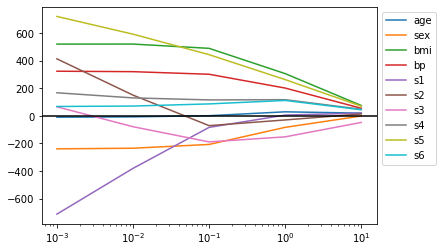

In [82]:
plt.semilogx(df_ridge)
plt.legend(df_ridge.columns, bbox_to_anchor=(1, 1))
plt.axhline(color='black')
plt.show()

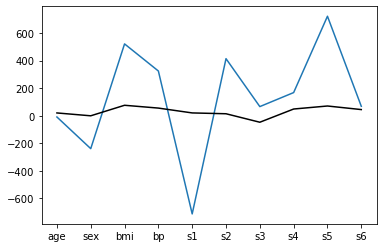

In [90]:
plt.plot(df_ridge.loc[0.001])
plt.plot(df_ridge.loc[10], color='black')

In [91]:
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    lasso=Lasso(alpha=a)
    lasso.fit(load_diabetes()['data'], load_diabetes()['target'])
    data.append(pd.Series(np.hstack([lasso.coef_])))

In [92]:
df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns = load_diabetes()['feature_names']
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


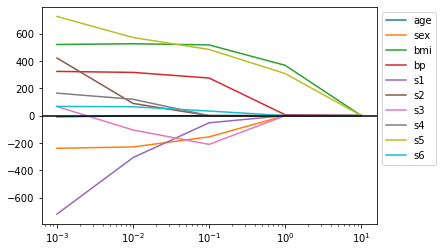

In [93]:
plt.semilogx(df_lasso)
plt.legend(df_lasso.columns, bbox_to_anchor=(1, 1))
plt.axhline(color='black')
plt.show()

In [96]:
body_df = pd.read_csv('bodyPerformance.csv')
body_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [104]:
body_target = body_df['class'].where(body_df['class'] == 'A').notna().astype('int').values

In [106]:
body_data = pd.get_dummies(body_df.drop('class', axis=1)).values

In [107]:
X_train, X_test, y_train, y_test = train_test_split(body_data, body_target, random_state=0)

In [114]:
pipe = make_pipeline(MinMaxScaler(), LogisticRegression(C=10, max_iter=10000)).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.8452807646356033, 0.849507315616602)

In [116]:
pipe.predict_proba(X_test), pipe.predict(X_test)

(array([[0.39172314, 0.60827686],
        [0.93965228, 0.06034772],
        [0.68699552, 0.31300448],
        ...,
        [0.23486034, 0.76513966],
        [0.9419083 , 0.0580917 ],
        [0.20083097, 0.79916903]]),
 array([1, 0, 0, ..., 1, 0, 1]))

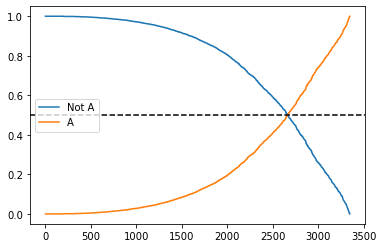

In [125]:
(pd.DataFrame(pipe.predict_proba(X_test), columns=['Not A', 'A'])
.sort_values(by='A')
.round(3)
.reset_index(drop=True)
.plot()
)
plt.axhline(y=0.5, color='black', linestyle='--')

In [127]:
roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])

0.9225112916237902

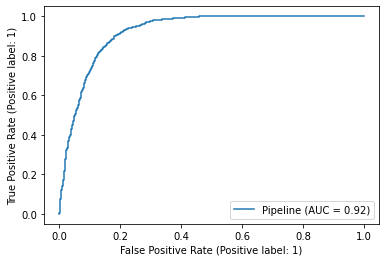

In [129]:
RocCurveDisplay.from_estimator(pipe, X_test, y_test)